In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

# Importing Power Generation & Weather Sensor Data

In [2]:
generation_data = pd.read_csv('Plant_2_Generation_Data.csv')

In [3]:
weather_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [4]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
18783,2020-05-24 22:45:00,4136001,LlT2YUhhzqhg5Sw,0.000000,0.000000,9038.000000,282654797.000000
17599,2020-05-24 06:15:00,4136001,Quc1TzYxW2pYoWX,37.453333,36.206667,6.533333,329543259.533333
24641,2020-05-28 08:00:00,4136001,oZZkBaNadn6DNKz,545.293333,534.466667,432.200000,1708171001.200000
21811,2020-05-26 16:45:00,4136001,Quc1TzYxW2pYoWX,325.146667,319.380000,7087.400000,329558446.400000
6809,2020-05-18 05:30:00,4136001,Quc1TzYxW2pYoWX,0.000000,0.000000,0.000000,329523237.000000


In [5]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'white',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3078,2020-06-16 02:45:00,4136001,iq8k7ZNt4Mwm3w0,24.021179,23.400911,0.000000
1601,2020-05-31 17:00:00,4136001,iq8k7ZNt4Mwm3w0,29.727227,31.107022,0.066090
1608,2020-05-31 18:45:00,4136001,iq8k7ZNt4Mwm3w0,28.521704,27.120938,0.000000
792,2020-05-23 06:30:00,4136001,iq8k7ZNt4Mwm3w0,24.541104,23.305287,0.058713
1441,2020-05-30 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.929975,26.396812,0.000000


# Adjust datetime format

In [6]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

# Merging generation data and weather sensor data

In [7]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
43319,2020-06-06 10:45:00,vOuJvMaM2sgwLmb,1090.366667,1064.040000,2831.466667,2359360.466667,31.227597,51.438762,0.778104
43355,2020-06-06 11:15:00,Quc1TzYxW2pYoWX,0.000000,0.000000,639.000000,329606249.000000,31.713857,50.969322,0.966507
28283,2020-05-30 07:30:00,PeE6FRyGXUgsRhN,146.226667,142.760000,116.600000,1348447886.600000,26.014155,27.832418,0.103966
42445,2020-06-06 01:00:00,Et9kgGMDl729KT4,0.000000,0.000000,2769.000000,1813934.000000,23.357766,21.010859,0.000000
2692,2020-05-16 06:45:00,NgDl19wMapZy17u,125.506667,122.080000,48.000000,111522114.000000,25.354186,25.459056,0.087557


# Adding separate time and date columns

In [8]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week

In [9]:
# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60


In [10]:
# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

In [11]:
df_solar.head(10)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
5,2020-05-15,LYwnQax7tkwH5Cb,0.0,0.0,1872.500000,1.794959e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
6,2020-05-15,LlT2YUhhzqhg5Sw,0.0,0.0,1094.357143,2.825928e+08,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
7,2020-05-15,Mx2yZCDsyf6DPfv,0.0,0.0,5692.200000,2.453646e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
8,2020-05-15,NgDl19wMapZy17u,0.0,0.0,1866.200000,1.115126e+08,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
9,2020-05-15,PeE6FRyGXUgsRhN,0.0,0.0,651.200000,1.348351e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [12]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [13]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

There is no Missing Values in the dataset 

In [14]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,22.517061,714.329522
std,370.569597,362.112118,2919.448386,729667771.073221,4.021294,11.226446,0.309365,8.527546,0.499120,1.474730,16.764084,415.672274
min,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,21.000000,15.000000,360.000000
50%,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,23.000000,30.000000,720.000000
75%,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,24.000000,45.000000,1080.000000
max,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,45.000000,1425.000000


# Converting 'SOURCE_KEY' from categorical form to numerical form

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


# Data Visualization:

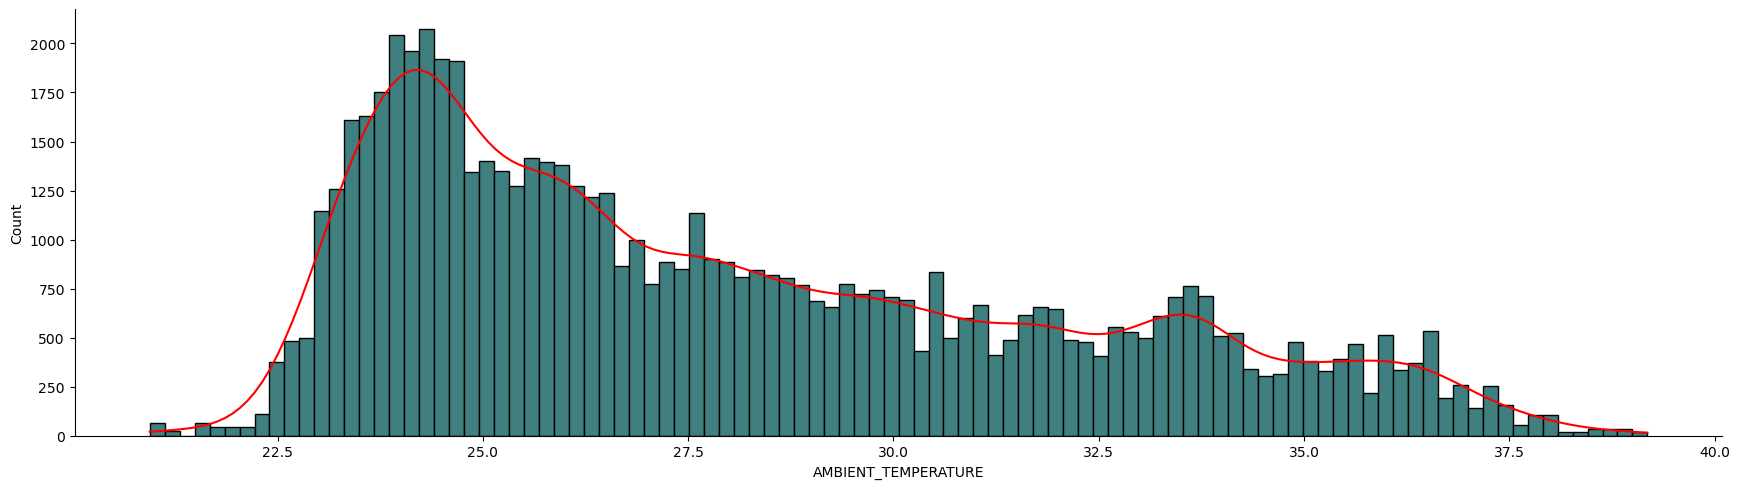

In [16]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [17]:
df_solar['DATE'].nunique()

34

The data of solar power generation is of 34 days 

# Faults & Abnormalities detection in solar power plant generation

Multiple Plotting of DC_POWER generation on per day basis.

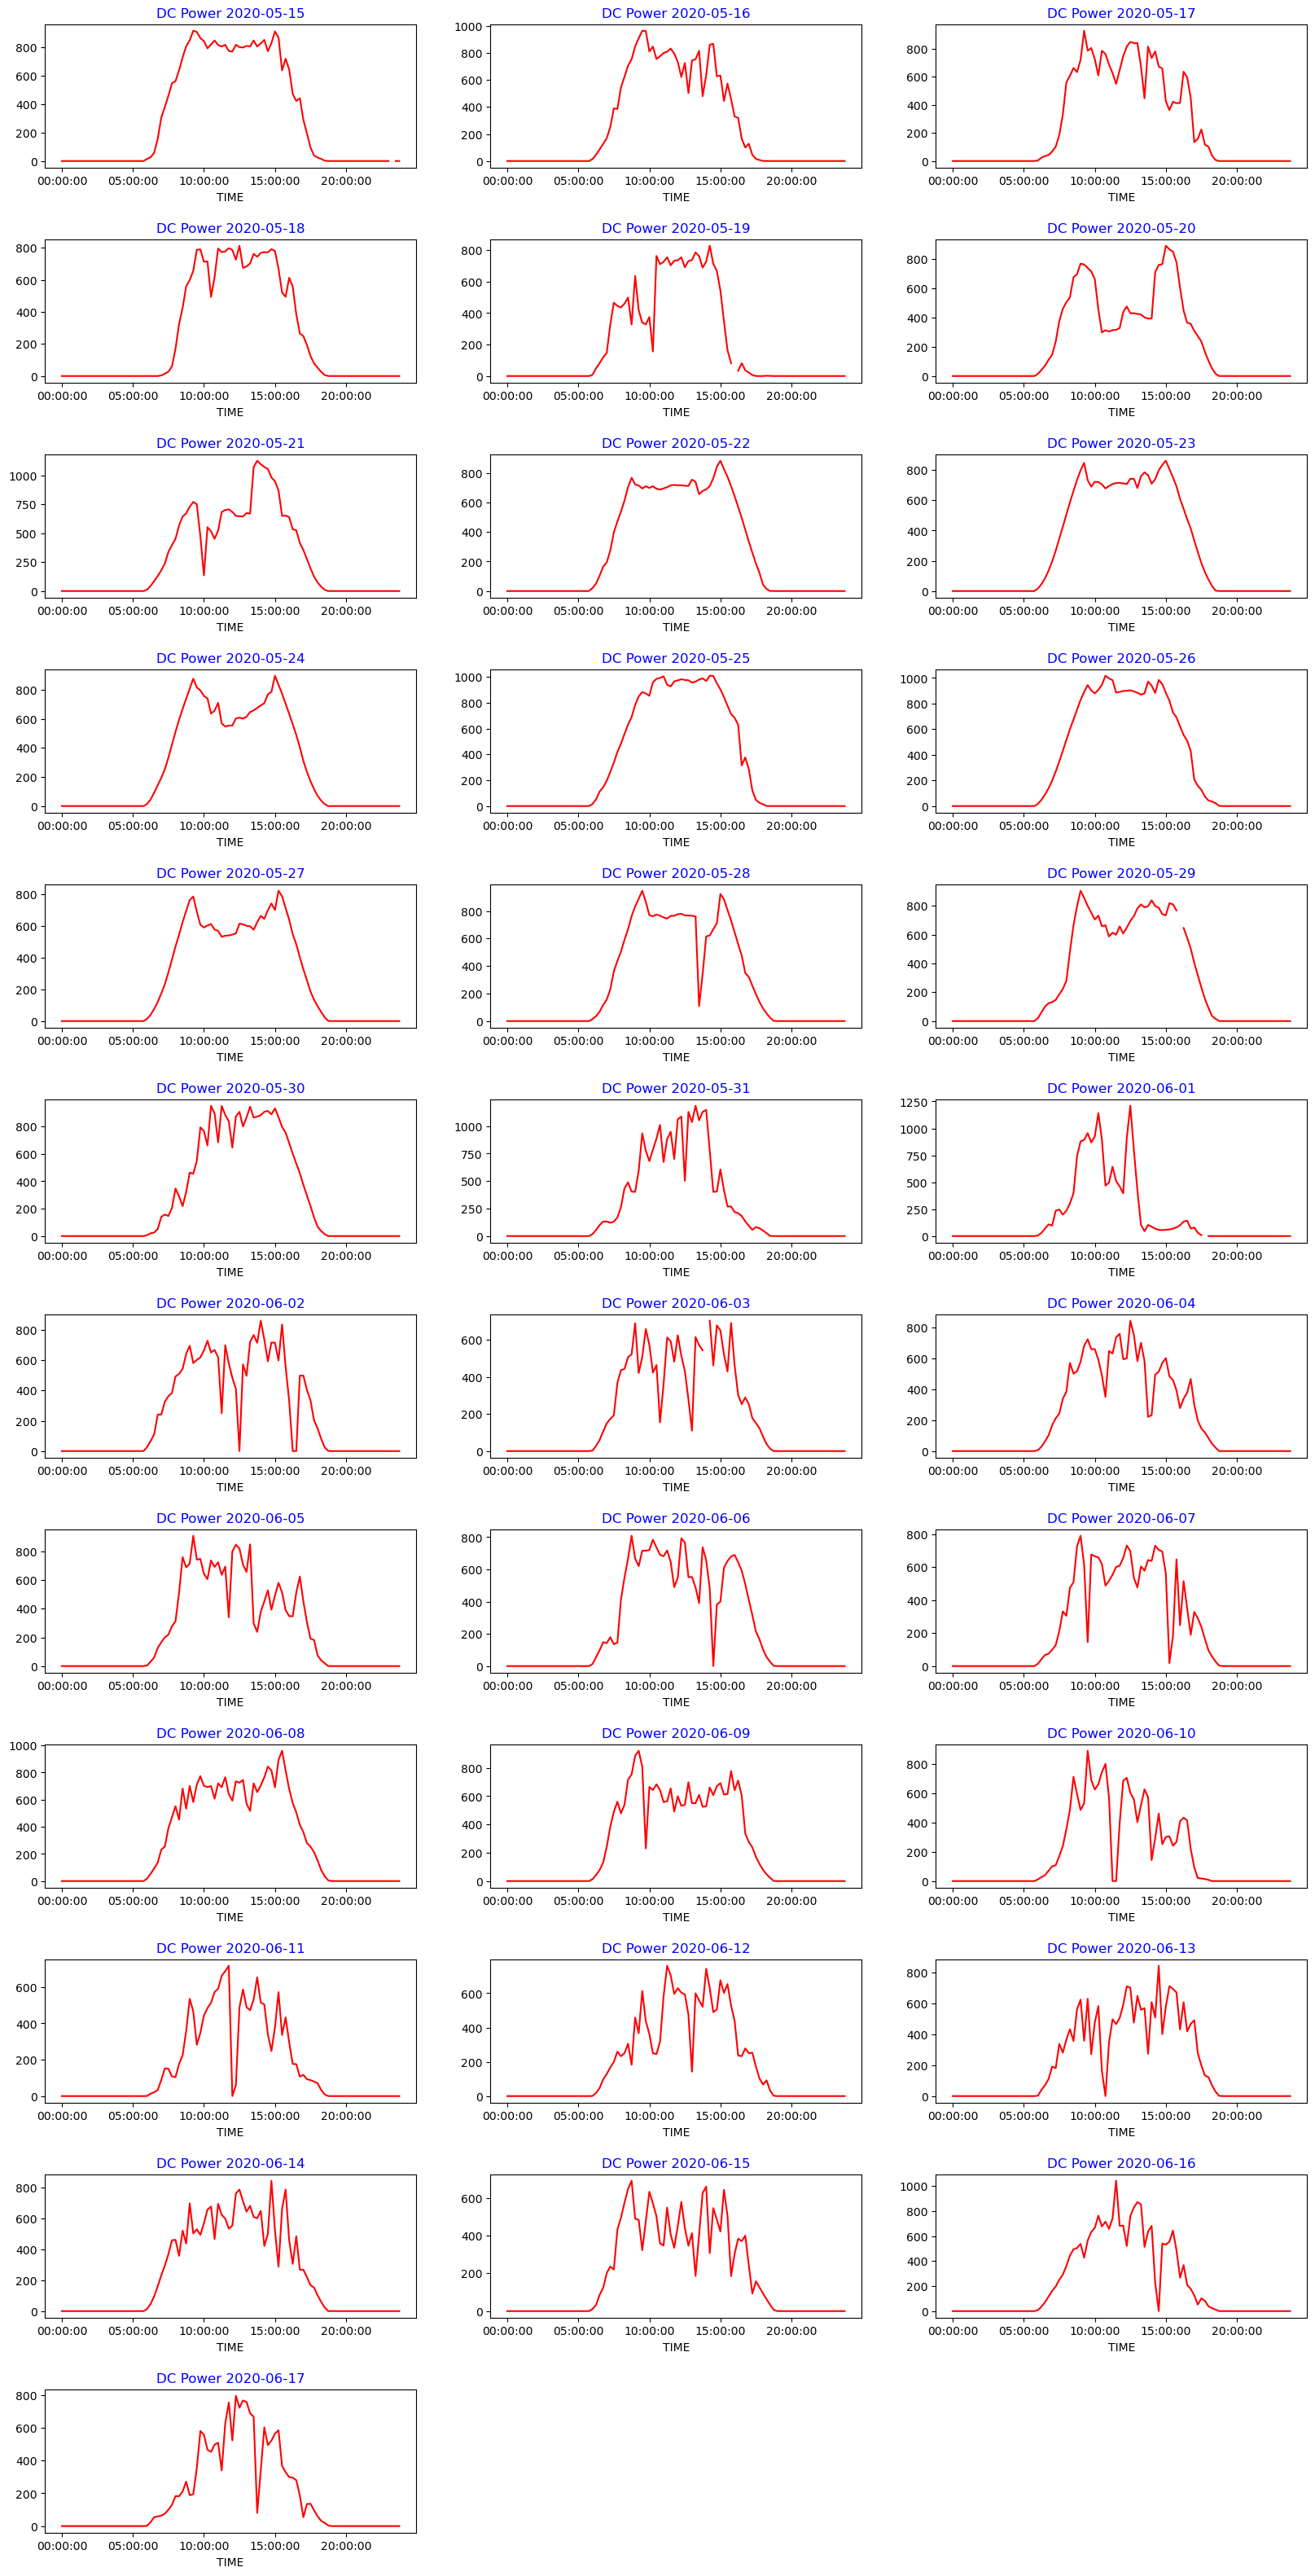

In [18]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=3)

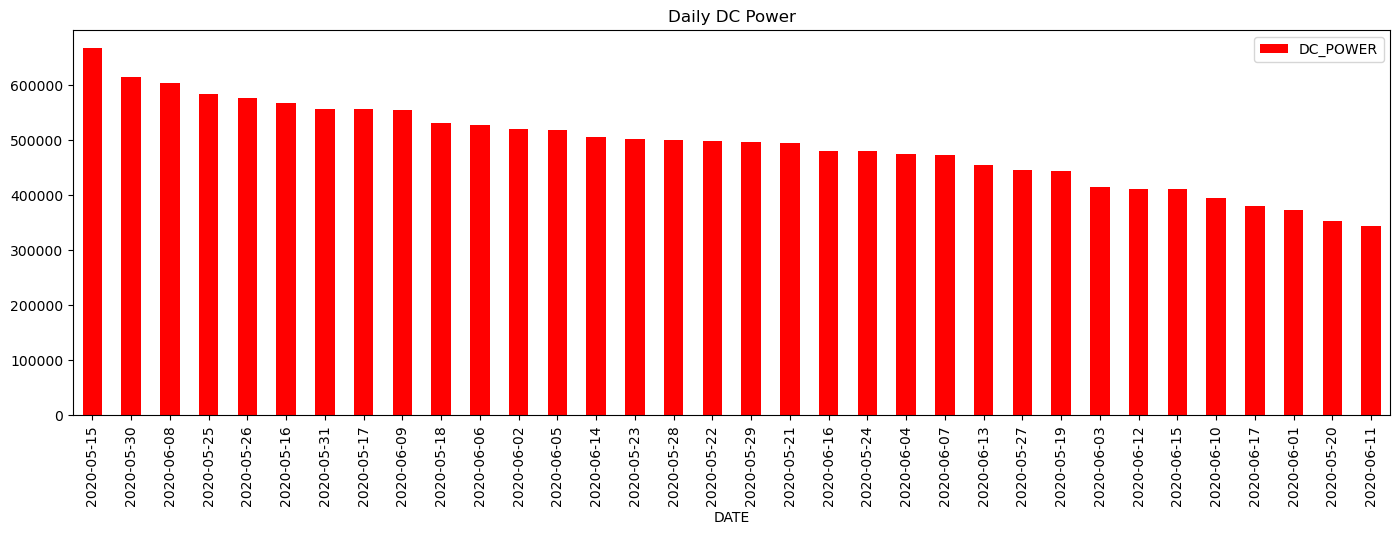

In [19]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

# Multiple Plotting of IRRADIATION generation on per day basis.

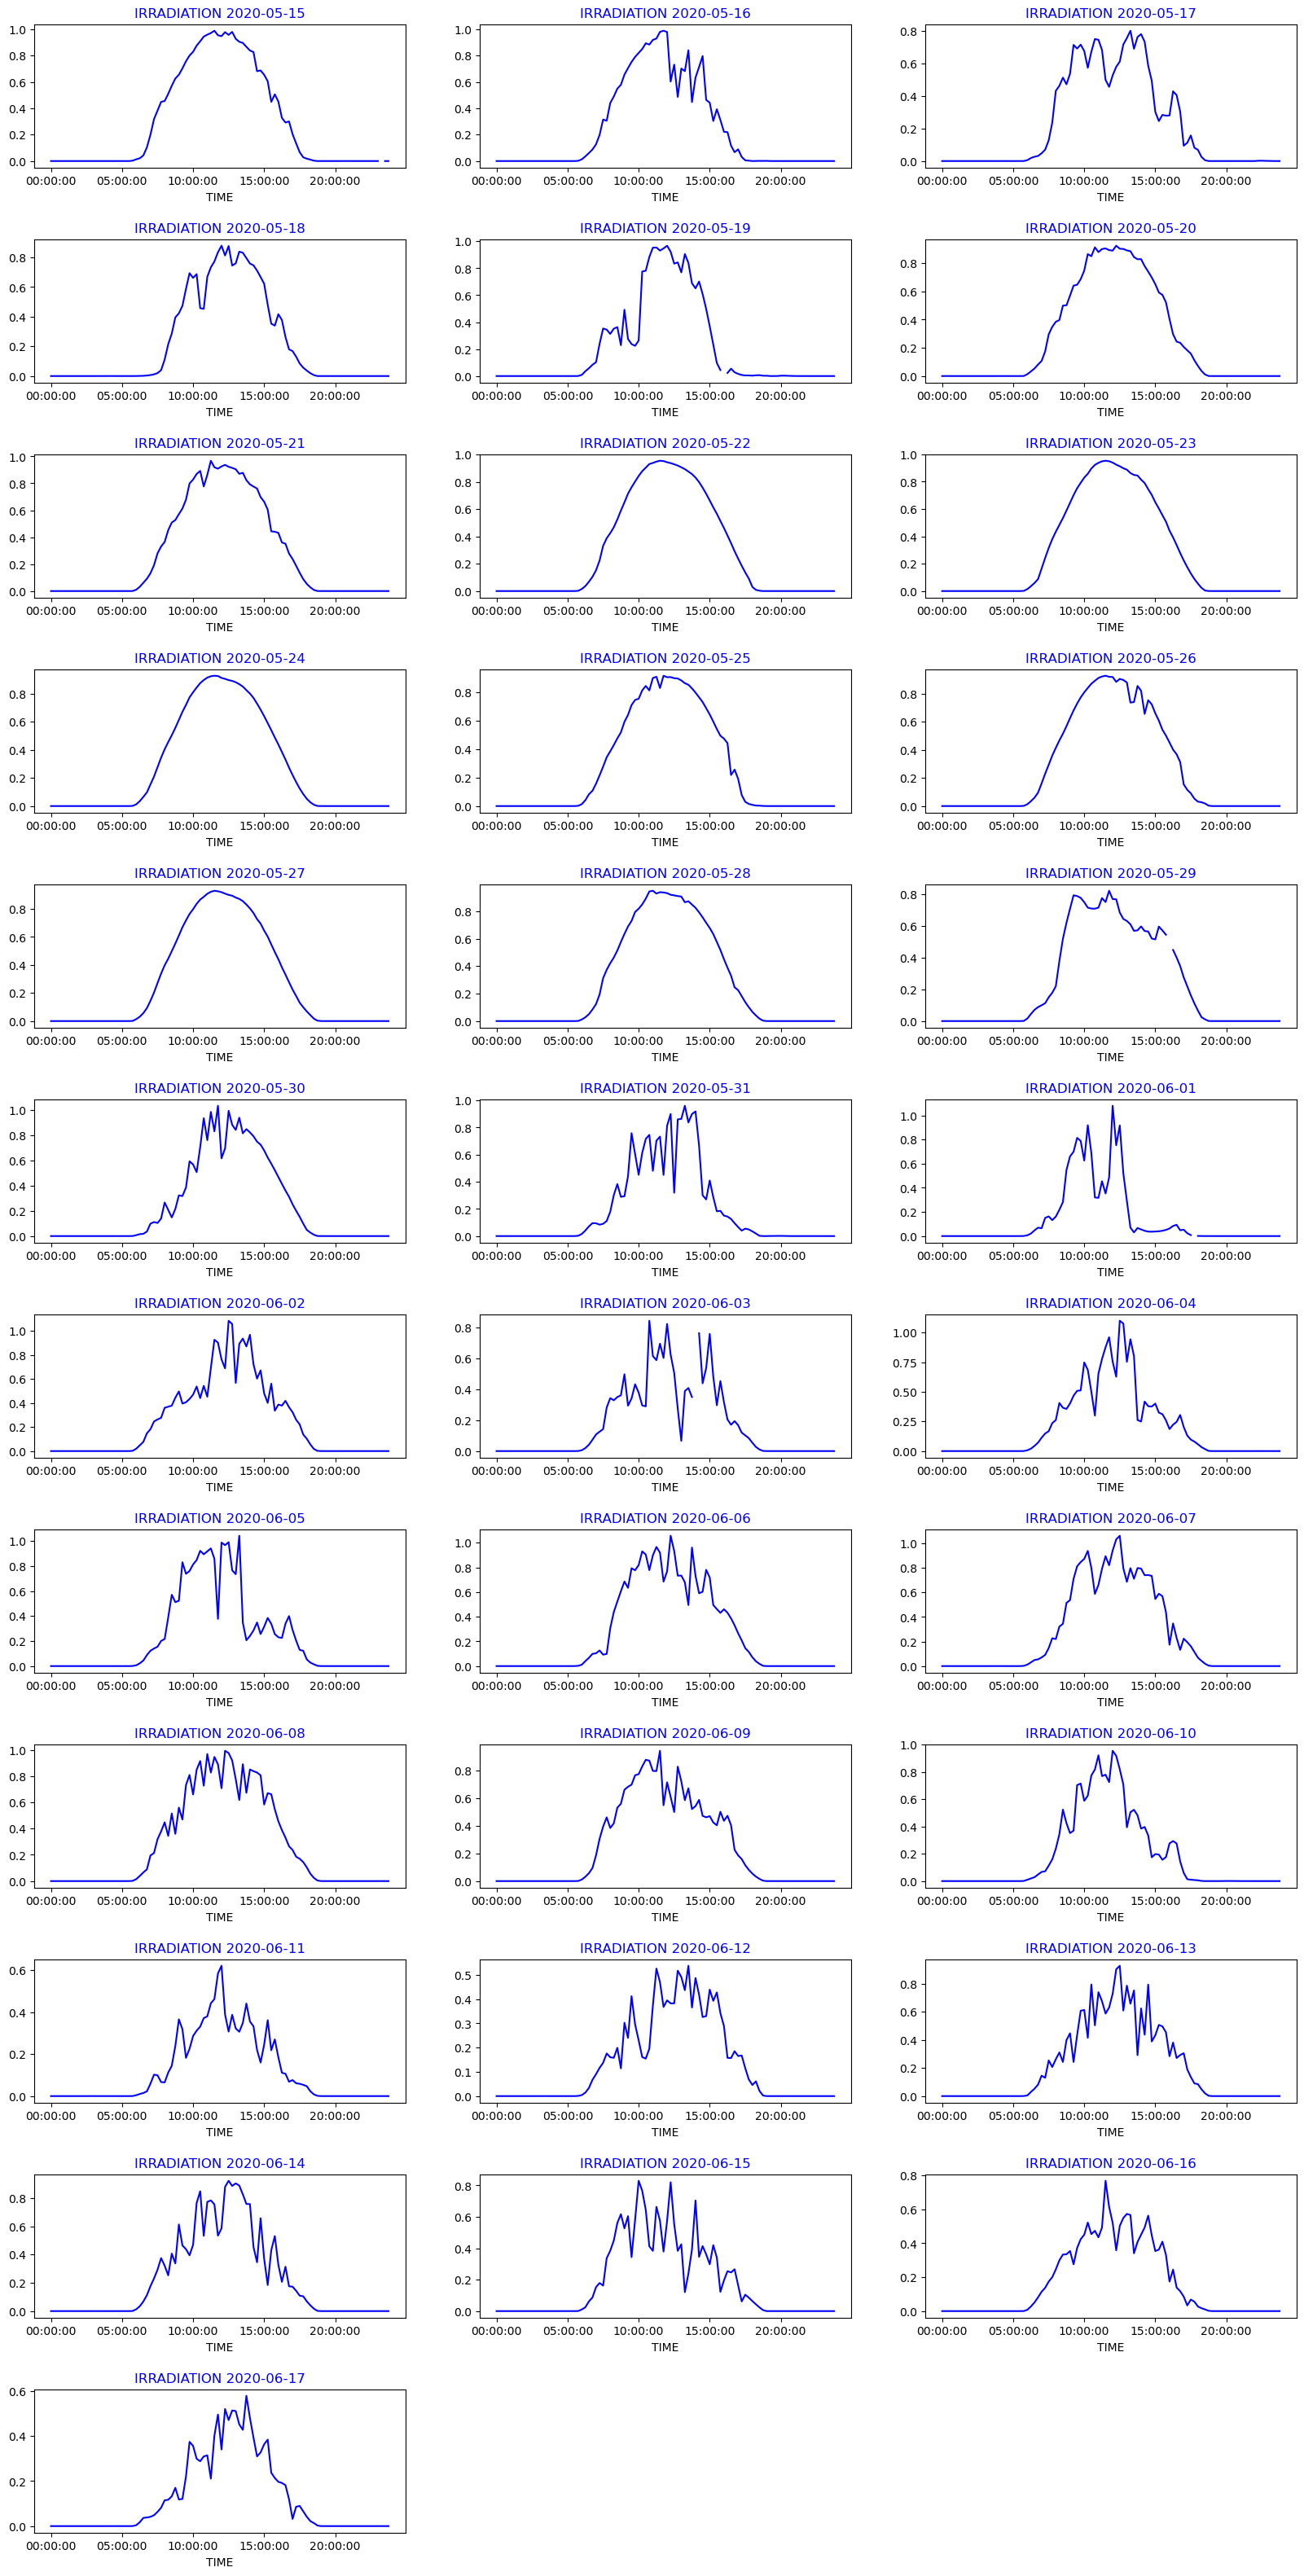

In [20]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

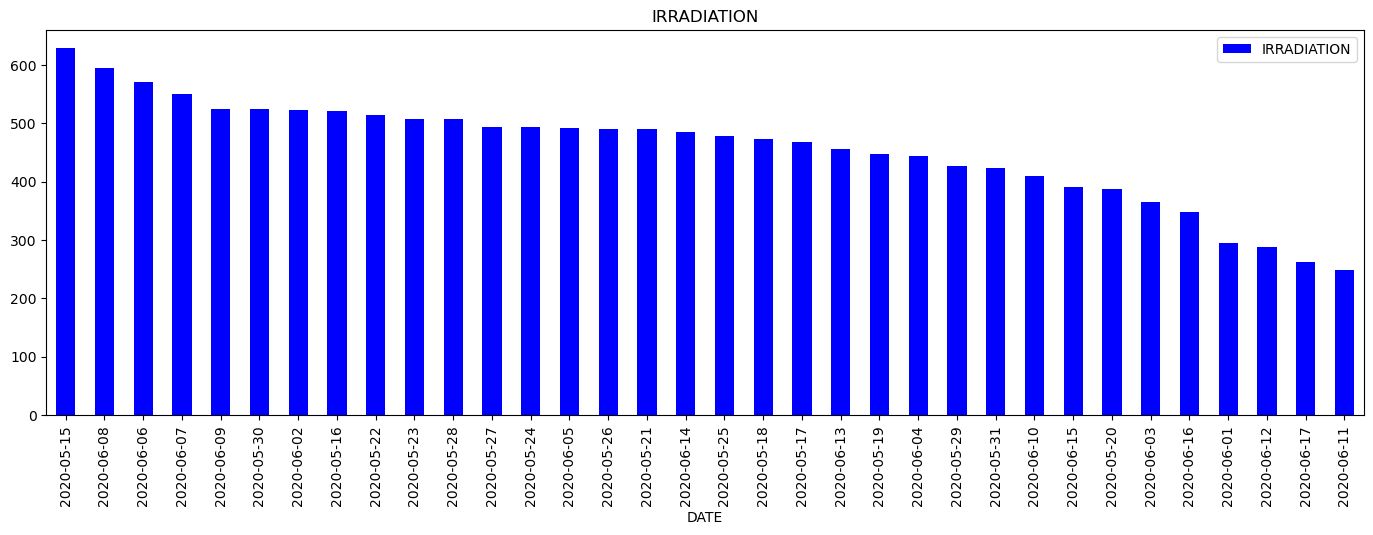

In [21]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

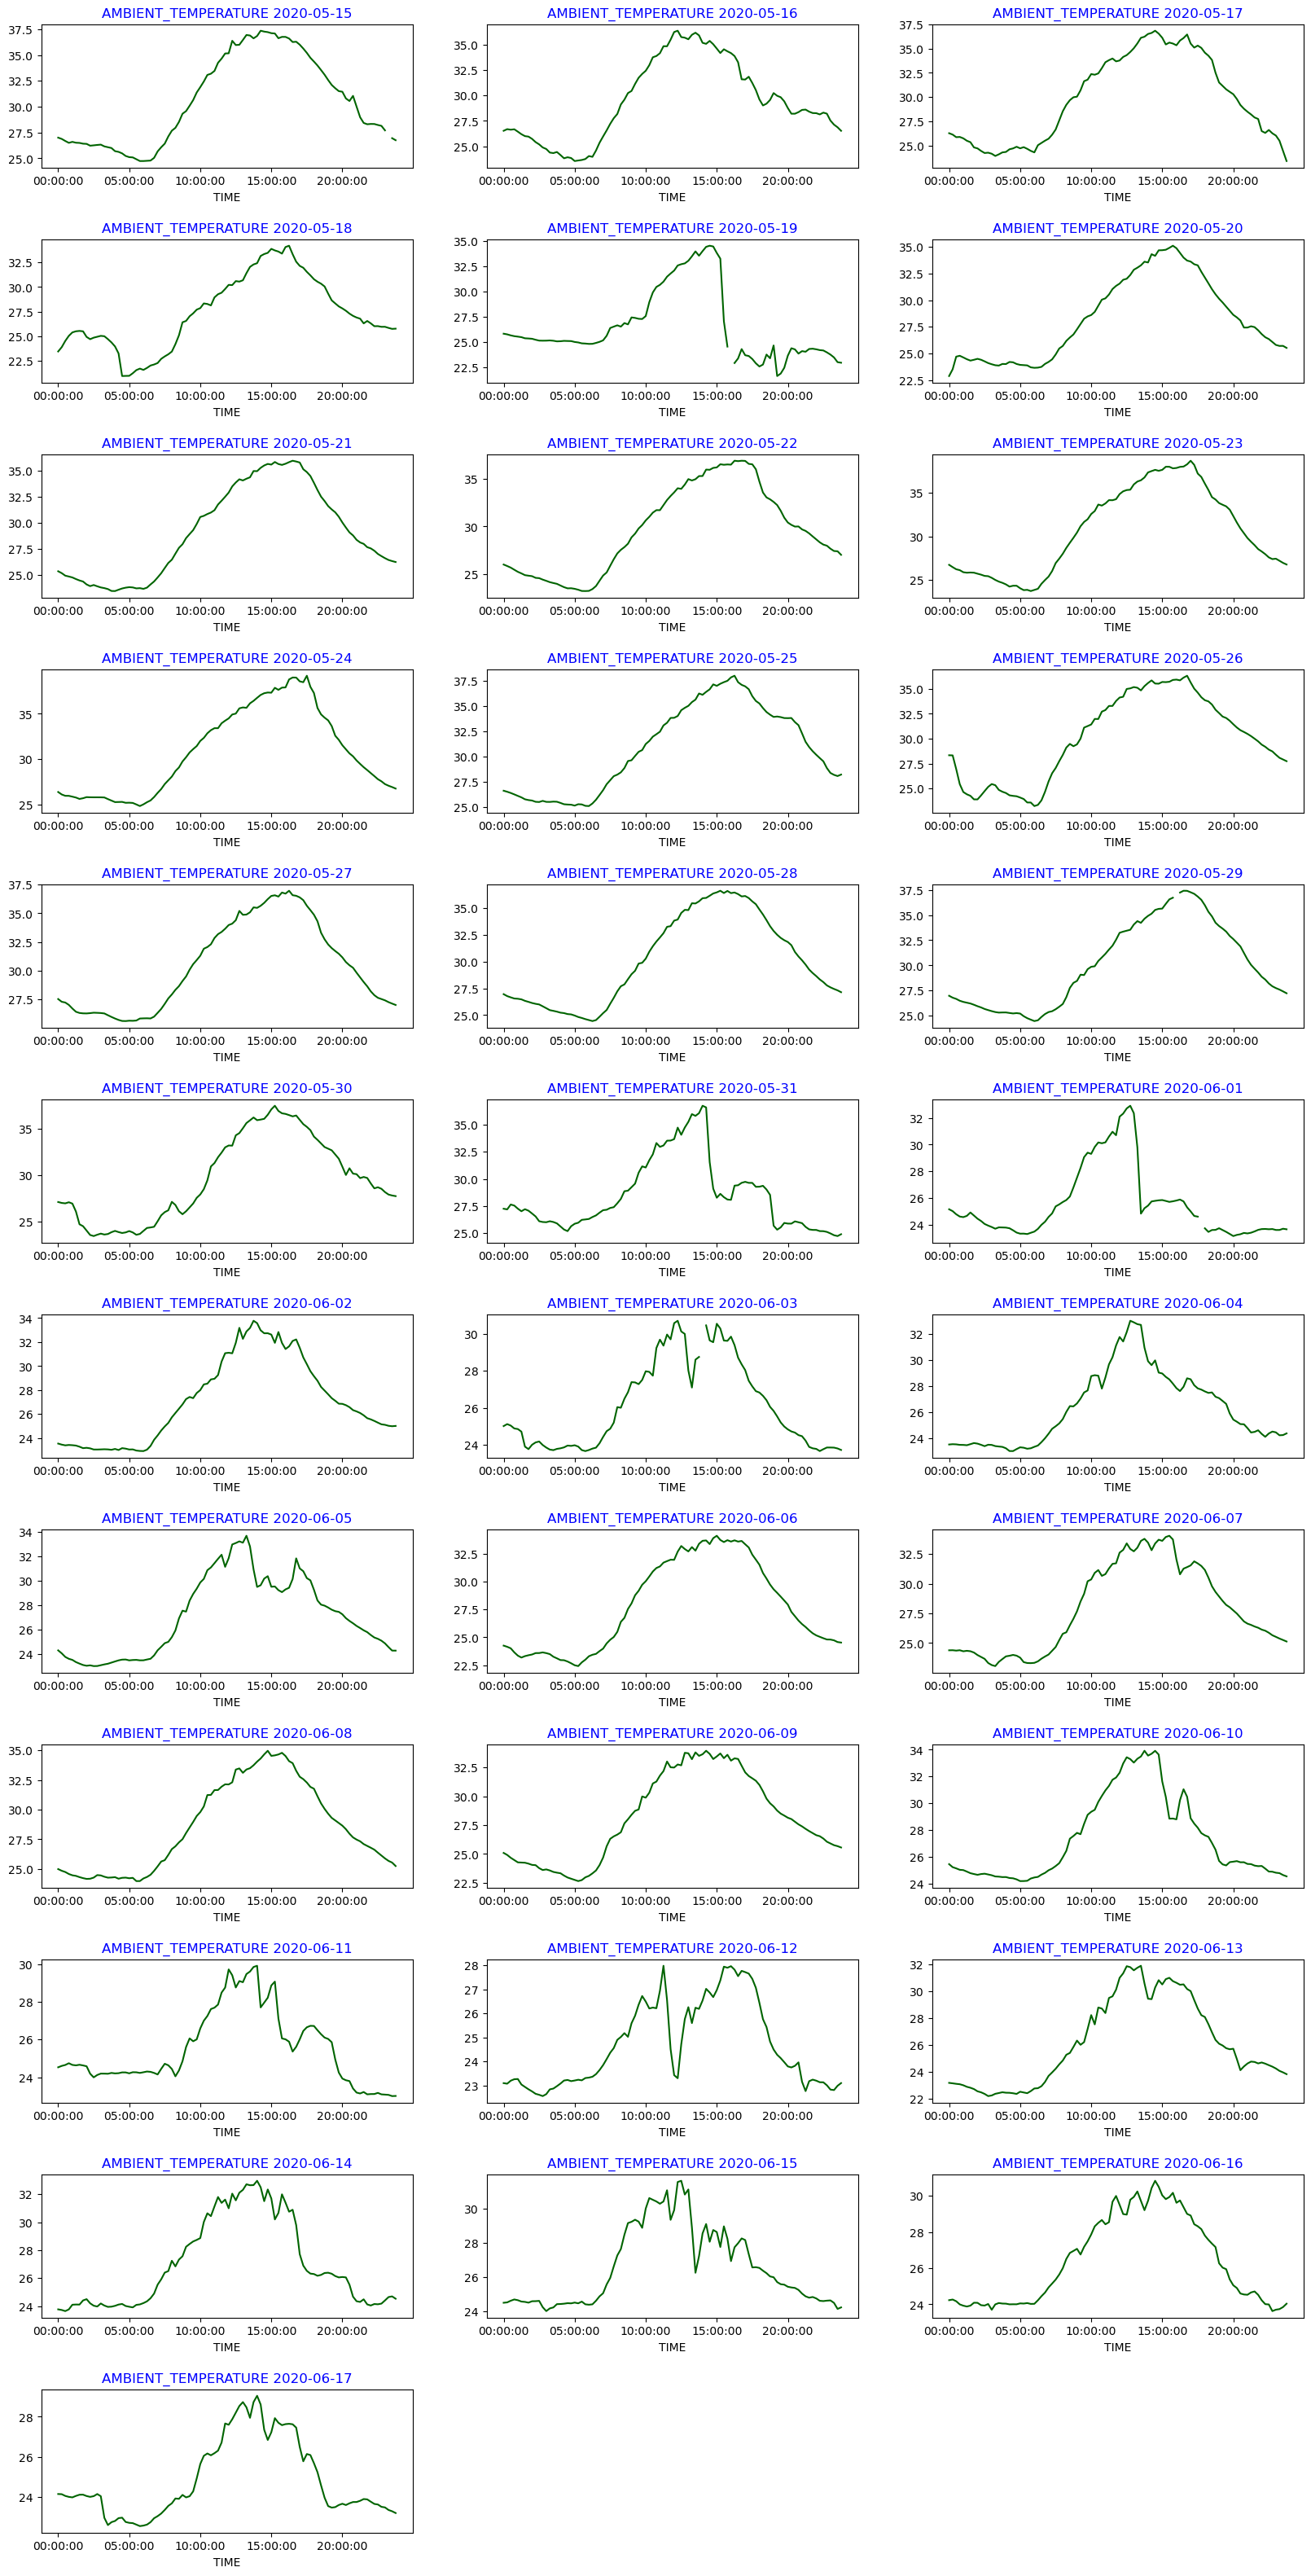

In [22]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

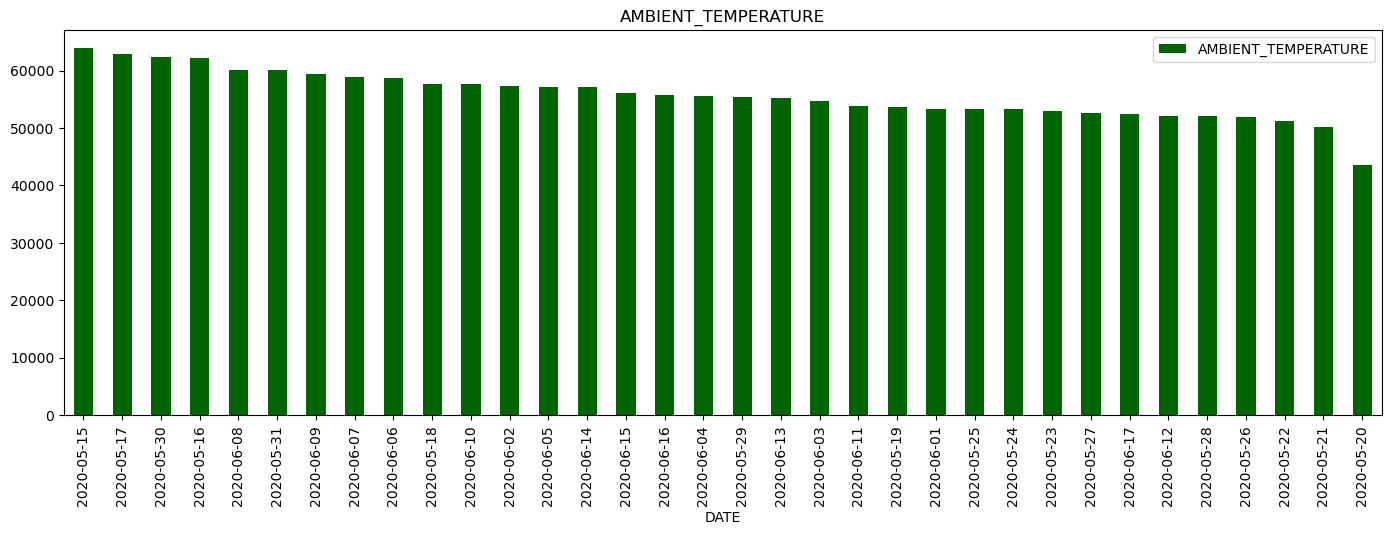

In [23]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

# Best and Worst Power generation comparision:

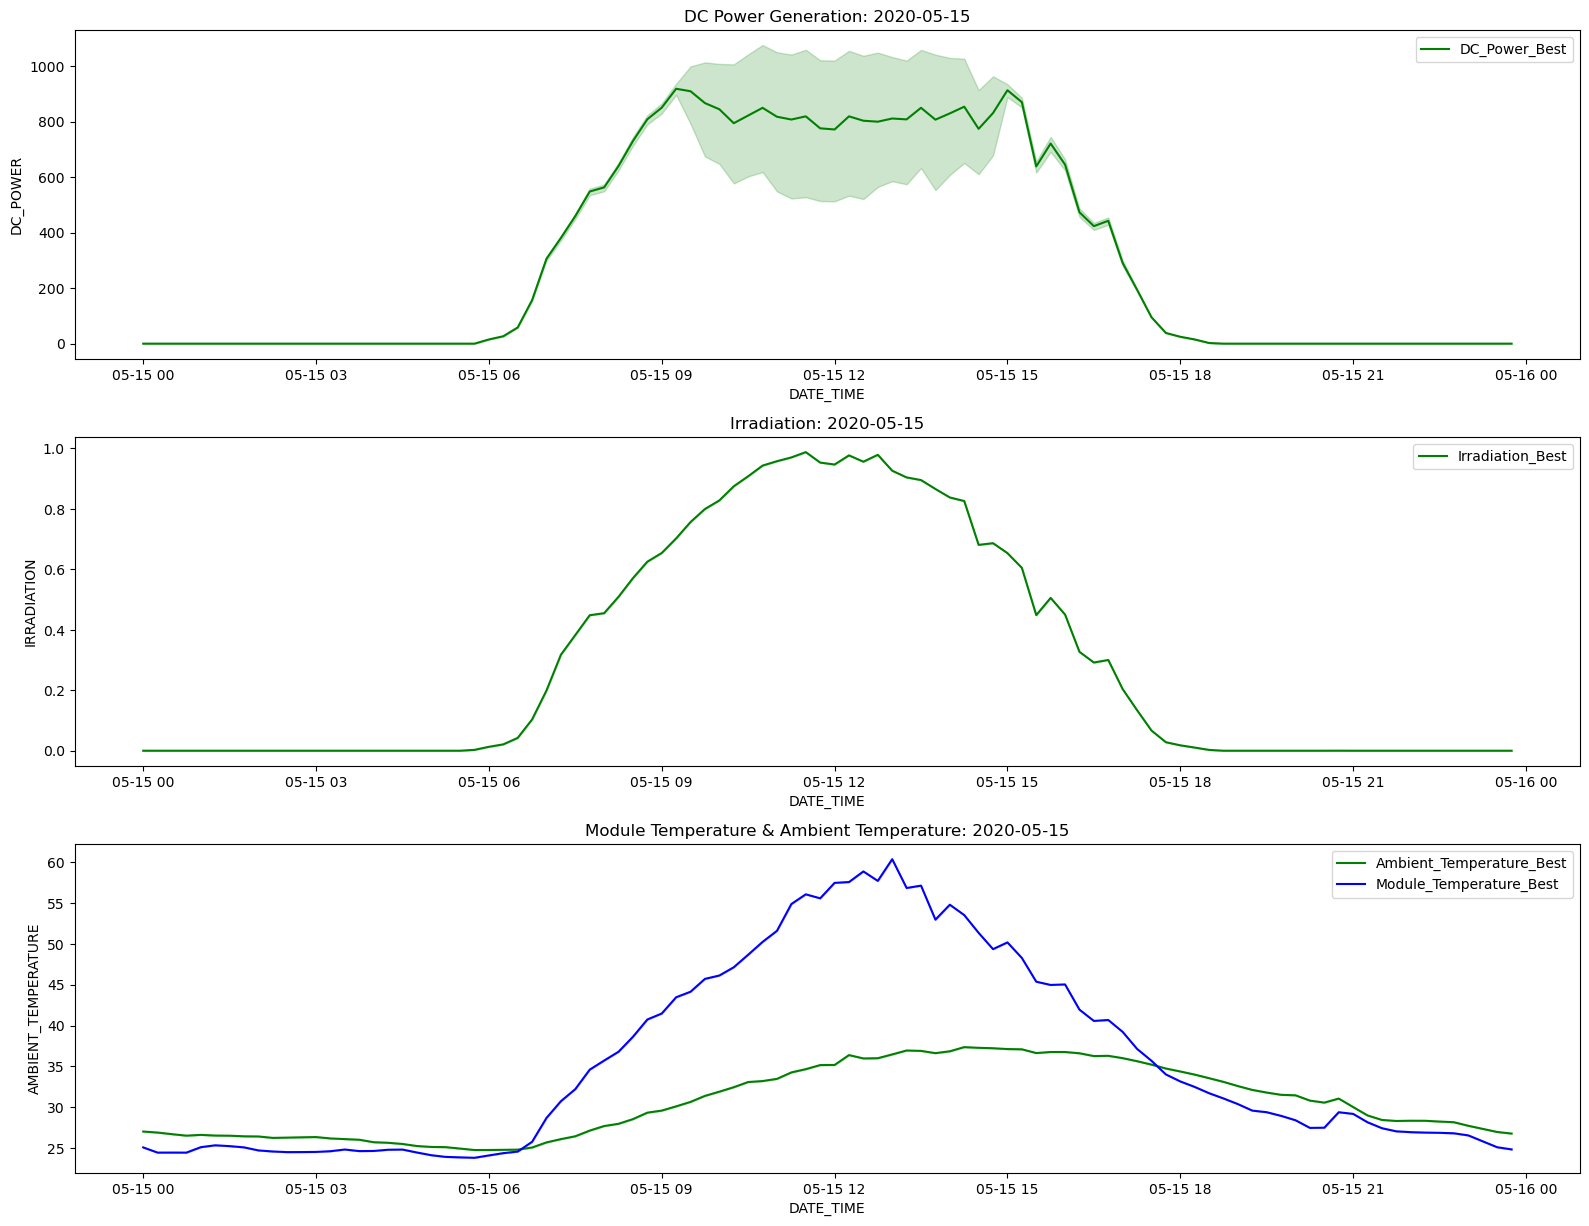

In [24]:
plt.figure(figsize=(16, 16))

date = ["2020-05-15"]

plt.subplot(411)
sns.lineplot(x="DATE_TIME", y="DC_POWER", data=df_solar[df_solar["DATE_STRING"].isin(date)], label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x="DATE_TIME", y="IRRADIATION", data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Irradiation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x="DATE_TIME", y="AMBIENT_TEMPERATURE", data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Ambient_Temperature_Best", color='green')
sns.lineplot(x="DATE_TIME", y="MODULE_TEMPERATURE", data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

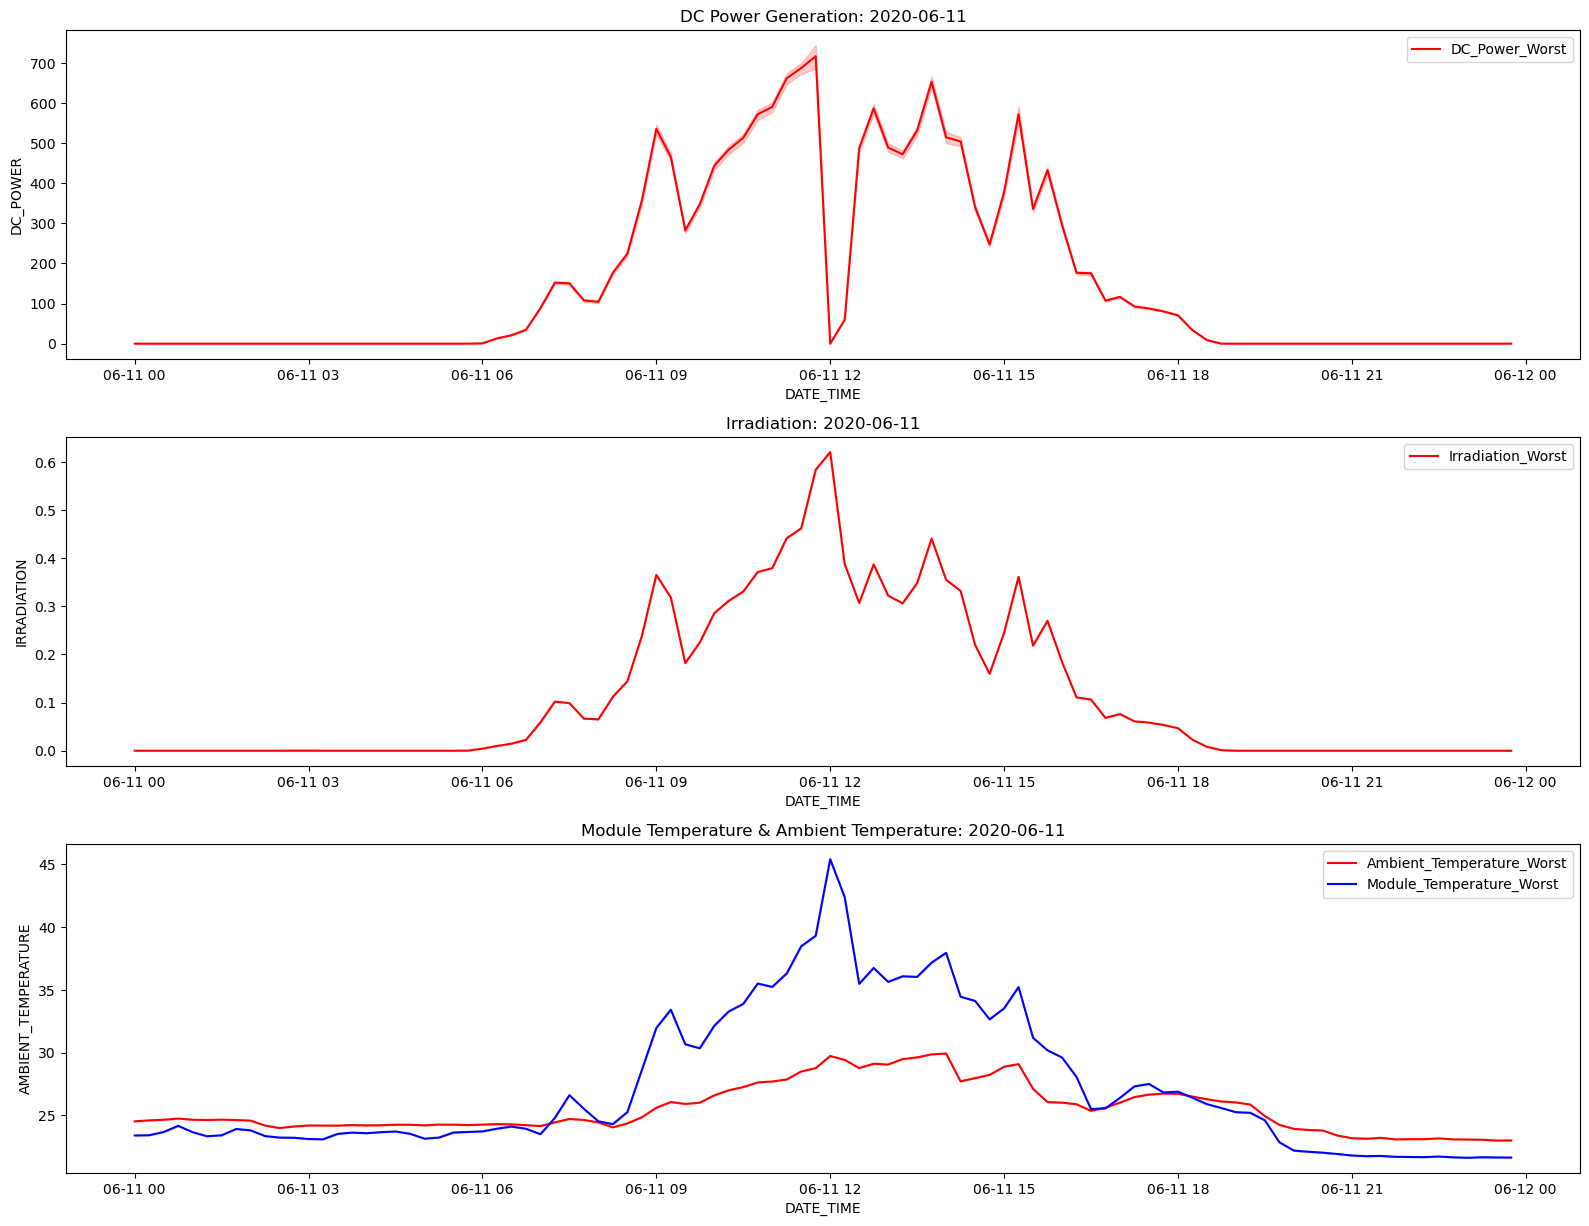

In [25]:
date = ["2020-06-11"]

plt.figure(figsize=(16, 16))

plt.subplot(411)
sns.lineplot(x="DATE_TIME", y="DC_POWER", data=df_solar[df_solar["DATE_STRING"].isin(date)], label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x="DATE_TIME", y="IRRADIATION", data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Irradiation_Worst", color='red')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x="DATE_TIME", y="AMBIENT_TEMPERATURE", data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Ambient_Temperature_Worst", color='red')
sns.lineplot(x="DATE_TIME", y="MODULE_TEMPERATURE", data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

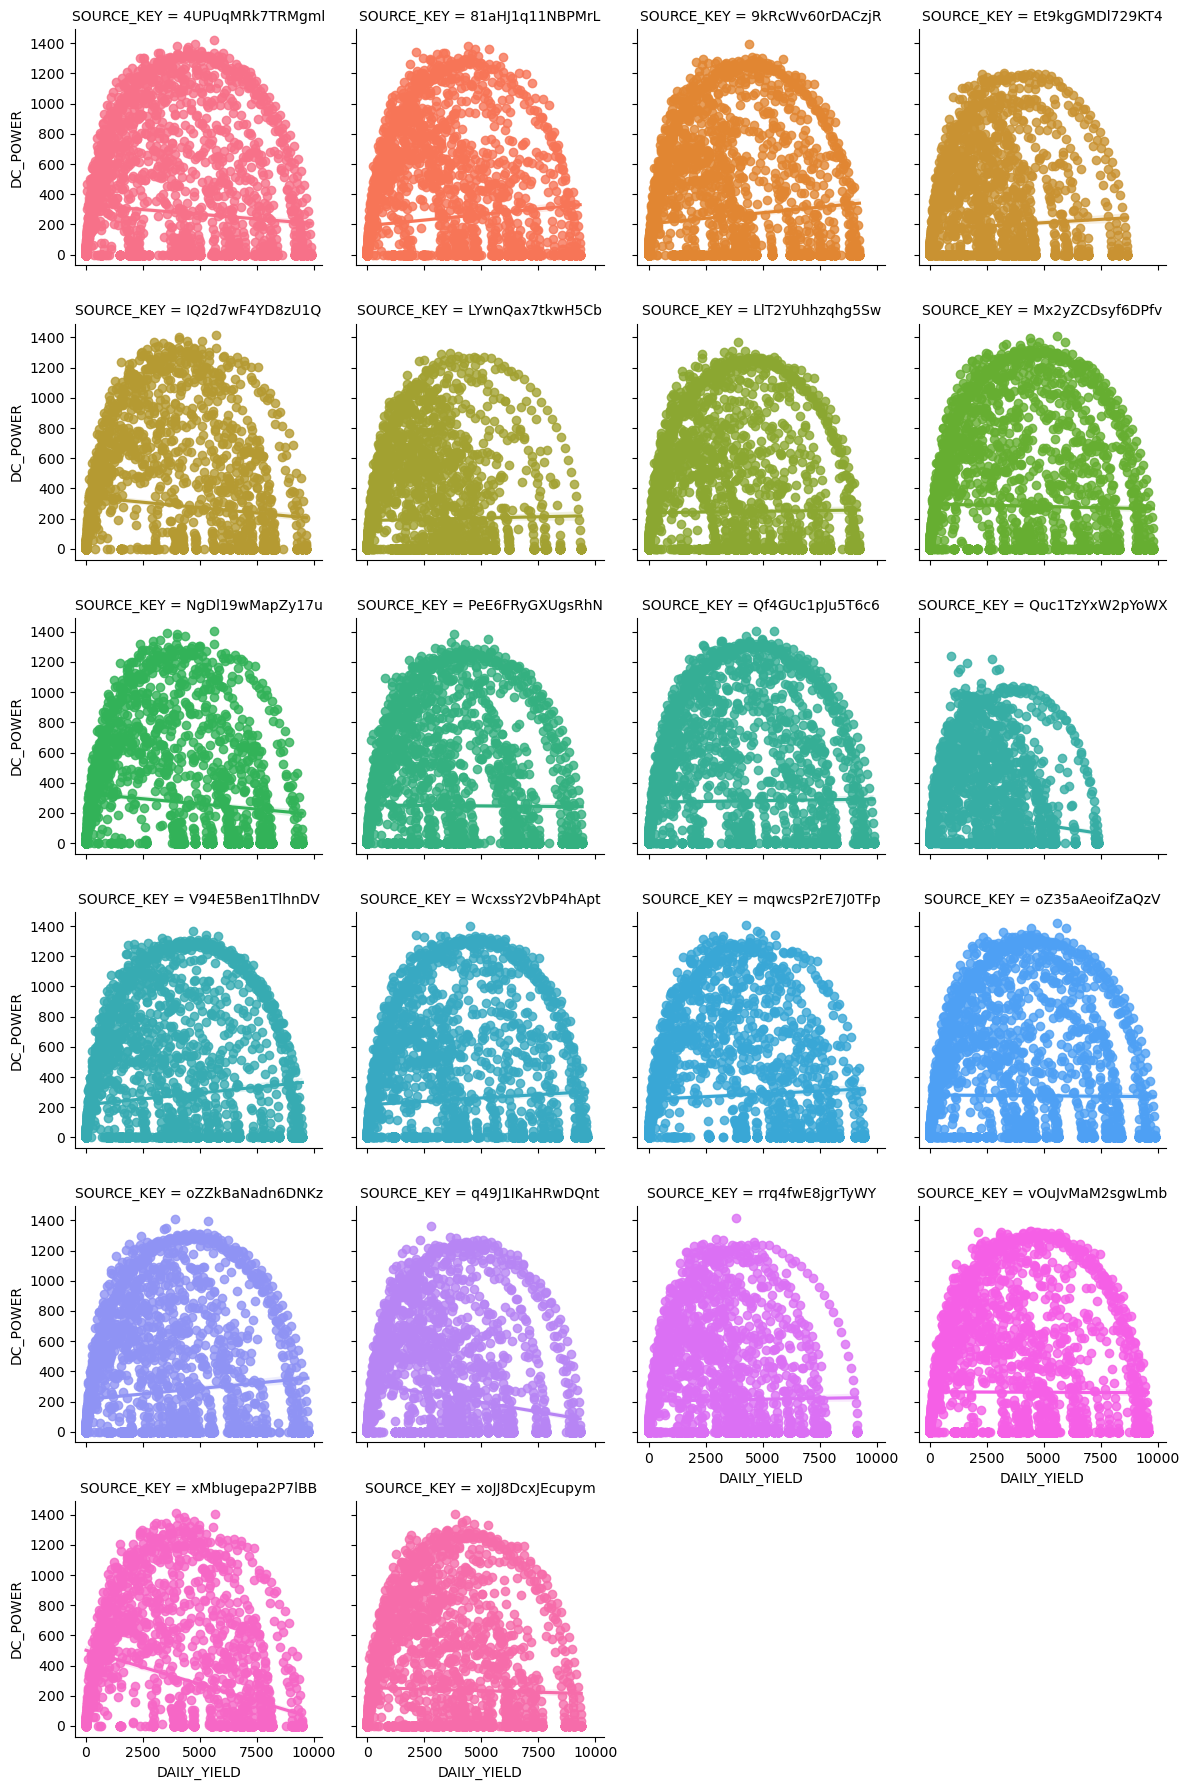

In [26]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

# Solar Power Plant Inverter Efficiency Calculation

In [27]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [28]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [29]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [30]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

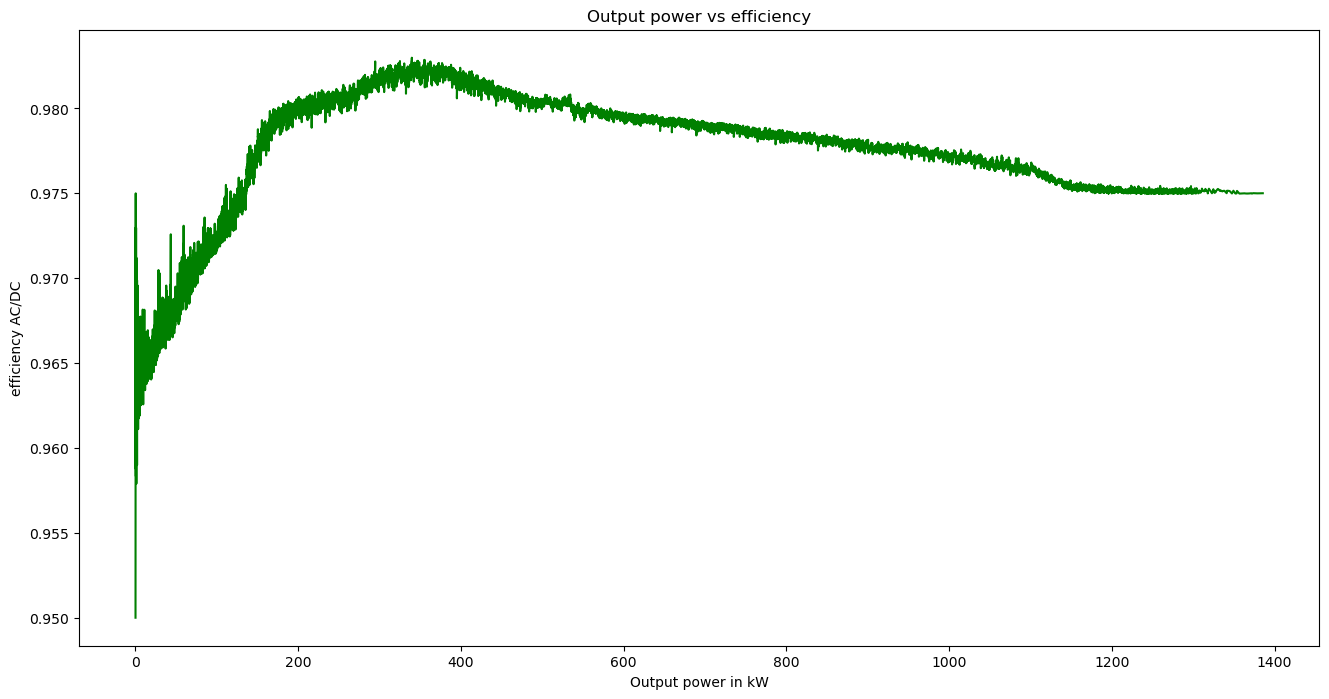

In [31]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]
plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

# Solar Power Prediction

In [32]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [33]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,0.0
1,0.000000,1.215279e+09,27.004764,25.060789,0.0,0.0
2,3075.333333,2.247720e+09,27.004764,25.060789,0.0,0.0
3,269.933333,1.704250e+06,27.004764,25.060789,0.0,0.0
4,3177.000000,1.994153e+07,27.004764,25.060789,0.0,0.0


In [34]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

# LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


# RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create the Random Forest Regressor model
rf_clf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_clf.predict(X_test)

# Calculate the R-squared score of the Random Forest Regressor
score_rf = r2_score(y_test, y_pred) * 100

print(f'Random Forest Model score = {score_rf:.4f}%')

Random Forest Model score = 99.9999%


In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


# DecisionTreeRegressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score# Create the Decision Tree Regressor model
dt_clf = DecisionTreeRegressor(random_state=42)  # You can set different hyperparameters if needed

# Train the model on the training data
dt_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_clf.predict(X_test)

# Calculate the R-squared score of the Decision Tree Regressor
score_dt = r2_score(y_test, y_pred) * 100

print(f'Decision Tree Model score = {score_dt:.4f}%')

Decision Tree Model score = 99.9998%


In [43]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


# Result Prediction

In [44]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.72494286 ...    0.         1007.15197143
    0.        ]


In [45]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
40426,0.000000,0.000000
50974,0.000000,0.000000
53919,684.913333,684.724943
2384,0.000000,0.000000
22014,0.000000,0.000000


In [46]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
40426,0.000000,0.000000,0.00000
50974,0.000000,0.000000,0.00000
53919,684.913333,684.724943,0.18839
2384,0.000000,0.000000,0.00000
22014,0.000000,0.000000,0.00000


In [47]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '10px'
        })

,Actual,Predicted,Error
40086,0.000000,0.000000,0.000000
62682,452.473333,452.294067,0.179267
37090,843.007143,842.864086,0.143057
22058,0.000000,0.000000,0.000000
1332,921.873333,921.668733,0.204600
51229,0.000000,0.000000,0.000000
28020,0.000000,0.000000,0.000000
37840,0.000000,0.000000,0.000000
37620,70.386667,70.357786,0.028881
27916,0.000000,0.000000,0.000000


In [48]:
# Create the models
lr_clf = LinearRegression()
rf_clf = RandomForestRegressor(n_estimators=100, random_state=42)
dt_clf = DecisionTreeRegressor(random_state=42)

# Train the models
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)

# Calculate the R-squared scores
score_lr = r2_score(y_test, y_pred_lr) * 100
score_rf = r2_score(y_test, y_pred_rf) * 100
score_dt = r2_score(y_test, y_pred_dt) * 100

# Create a table to show the output
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'R-squared Score (%)': [score_lr, score_rf, score_dt]
}

output_table = pd.DataFrame(data)

print(output_table)

               Model  R-squared Score (%)
0  Linear Regression            99.999426
1      Random Forest            99.999922
2      Decision Tree            99.999849
